In [1]:
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
url = 'https://ja.wikipedia.org/wiki/R-1%E3%81%90%E3%82%89%E3%82%93%E3%81%B7%E3%82%8A'
dfs = pd.read_html(url)

In [3]:
len(dfs)

77

In [4]:
tables = []
for i in range(30, 77):
    if len(dfs[i])==4:
        tables.append(dfs[i])
print(len(tables))

27


In [5]:
tables = [tbl.iloc[:, tbl.columns.get_loc('名前')+1:-1] for tbl in tables]

In [6]:
tables[0]

,三枝,関根,天野,木村,石井,板尾,高田
0,0,2,1,0,1,1,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,1
3,2,1,2,2,2,2,2


In [7]:
def extract_features(table):
    features = []
    names = []
    for c in (table.columns):
        if not c in ['d', 'Twitter']:
            if (table[c].sort_values() == [0, 0, 0, 3]).all():
                features.append('0_0_0_3')
            elif (table[c].sort_values() == [0, 0, 1, 2]).all():
                features.append('0_0_1_2')
            elif (table[c].sort_values() == [0, 1, 1, 1]).all():
                features.append('0_1_1_1')
            names.append(c)
    return features, names

In [8]:
features = [extract_features(tbl) for tbl in tables]
patterns = sum([fe[0] for fe in features], [])
names = sum([fe[1] for fe in features], [])

df = pd.DataFrame({
    'names': names[:len(patterns)],
    'patterns': patterns
})

In [9]:
df.tail()

,names,patterns
154,関根,0_0_0_3
155,久本,0_0_1_2
156,陣内,0_0_1_2
157,友近,0_0_1_2
158,勝俣,0_0_1_2


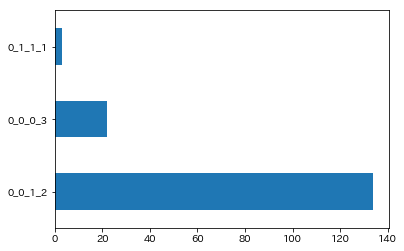

In [10]:
df['patterns'].value_counts().plot.barh()

Text(0, 0.5, '')

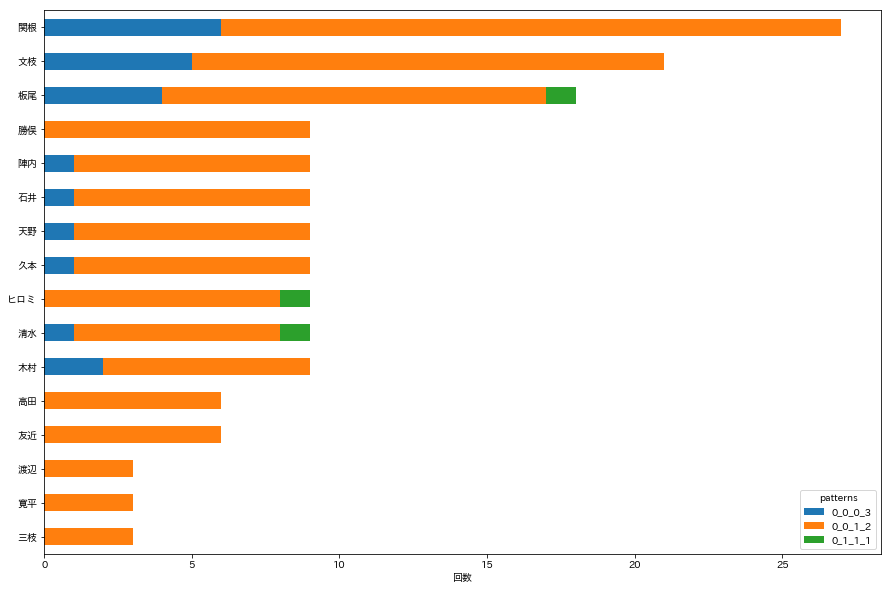

In [11]:
pd.crosstab(df['names'], df['patterns']).sort_values('0_0_1_2').plot.barh(stacked=True, figsize=(15, 10))
plt.rcParams["font.size"] = 30
plt.xlabel('回数')
plt.ylabel('')

In [12]:
# http://hamada.hatenablog.jp/entry/2019/08/20/215438
def gini(y):
    y = list(y)
    y.sort()
    n = len(y)
    nume = 0
    for i in range(n):
        nume = nume + (i+1)*y[i]
    deno = n*sum(y)
    return ((2*nume)/deno - (n+1)/(n))*(n/(n-1))

def calc_gini(table):
    return gini(table.sum(axis=1))

res = [calc_gini(tbl) for tbl in tables[:-3]]

years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
blocks = ['A', 'B', 'C']

labels = [y + '_' + b for y, b in list(itertools.product(years, blocks))]

df_gini = pd.DataFrame({
    'labels': labels,
    'gini': res
})

Text(0.5, 0, 'gini index')

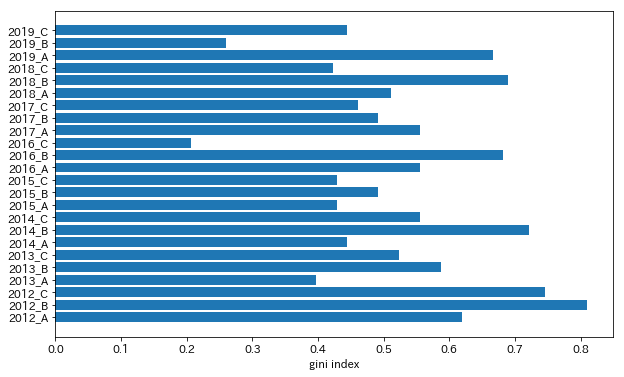

In [13]:
plt.figure(figsize=(10, 6))
plt.rcParams["font.size"] = 11
plt.barh(df_gini['labels'], df_gini['gini'], tick_label=df_gini['labels'], align="center")
plt.xlabel('gini index')

In [24]:
gini = []
for i in range(8):
    gini.append(df_gini.loc[3*i: 3*i+2]['gini'].mean())

Text(0.5, 0, 'gini index')

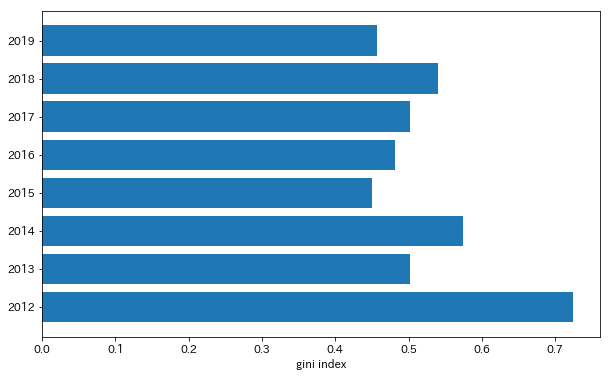

In [25]:
plt.figure(figsize=(10, 6))
plt.rcParams["font.size"] = 11
plt.barh(years, gini, tick_label=years, align="center")
plt.xlabel('gini index')